In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1.1: Reading the Preprocessed Data:

In [6]:
df = pd.read_csv(r'F:\netsol_project\task_1\credit_decisioning_risk_assesment\notebook\data\preprocessed_data.csv')
df.head()

,Unnamed: 0,last_fico_range_high,last_fico_range_low,collection_recovery_fee,total_pymnt_inv,debt_settlement_flag,sub_grade,int_rate,grade,term,fico_range_high,loan_condition_num
0,0,1.272270,1.294706,-0.290947,1.679300,N,A2,-1.439947,A,36 months,1.287940,0
1,1,-0.266879,-0.354956,-0.290947,-0.067669,N,F1,2.615441,F,36 months,-0.502570,0
2,3,0.410346,0.370895,-0.290947,-1.025539,N,D2,1.053821,D,36 months,-0.860672,0
3,6,1.641665,1.690625,-0.290947,0.075284,N,A2,-1.523292,A,36 months,-0.144468,0
4,8,0.410346,0.370895,-0.290947,-0.540371,N,B1,-0.770994,B,36 months,0.392685,0


## 2. Model Development:

#### 2.1: Rearranging the columns:

In [9]:
df.columns.tolist()

['Unnamed: 0',
 'last_fico_range_high',
 'last_fico_range_low',
 'collection_recovery_fee',
 'total_pymnt_inv',
 'debt_settlement_flag',
 'sub_grade',
 'int_rate',
 'grade',
 'term',
 'fico_range_high',
 'loan_condition_num']

In [10]:
df1 = df[['last_fico_range_high', 'last_fico_range_low',
            'collection_recovery_fee','total_pymnt_inv',
            'debt_settlement_flag', 'sub_grade',
            'int_rate', 'grade',
            'term', 'fico_range_high',
            'loan_condition_num']]

#### 2.2: Making X & Y variables:

In [13]:
X = df1.values[:,0:10]
y = df1.values[:,-1]

In [14]:
print(X)

[[1.2722696019153408 1.294706131920417 -0.2909473118695798 ... 'A'
  ' 36 months' 1.287939974268132]
 [-0.266878806616912 -0.3549560223064503 -0.2909473118695798 ... 'F'
  ' 36 months' -0.502570220353185]
 [0.4103464931372792 0.3708953255533712 -0.2909473118695798 ... 'D'
  ' 36 months' -0.8606722592774483]
 ...
 [0.287214620454699 0.2389223532152218 -0.2909473118695798 ... 'C'
  ' 36 months' 0.5717358964196052]
 [-0.820972233688523 -0.9488343978281224 -0.2909473118695798 ... 'C'
  ' 36 months' -1.03972327873958]
 [-2.175422833196905 0.1729358670461471 2.651490343770398 ... 'D'
  ' 36 months' -0.1444681814289215]]


In [15]:
print(y)

[0 0 0 ... 0 0 1]


### 2.3: Performing Label Encoding and One Hot Encoding:

In [16]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [18]:
cat_cols = df1.select_dtypes(include=['object'])

In [19]:
cat_cols.nunique()

debt_settlement_flag     2
sub_grade               35
grade                    7
term                     2
dtype: int64

#### 2.3.1: Label Encoding

In [20]:
labelencoder = LabelEncoder()

In [21]:
cols =[4,5,7,8]
for column in cols:
    X[:,column] = labelencoder.fit_transform(X[:,column])

#### 2.3.2: OneHot Encoding:

In [22]:
cols =[4,5,7,8]
onehotencoder = OneHotEncoder(categories='auto',sparse_output=False)
X_encoded = onehotencoder.fit_transform(X[:,cols])
X = np.delete(X,cols,axis=1)
X = np.concatenate((X,X_encoded),axis=1)

#### 2.3.3: Splitting the Data:

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
# Tuple Unpacking
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [29]:
#!pip install xgboost

## 3. Model Development:

In [30]:
model = {}

# for logistic regression
from sklearn.linear_model import LogisticRegression 
model['Logistic Regression'] = LogisticRegression()

# for decision tree
from sklearn.tree import DecisionTreeClassifier
model['Decision Tree Classifier'] = DecisionTreeClassifier()

# for random forest
from sklearn.ensemble import RandomForestClassifier
model['Random Forest Classifier'] = RandomForestClassifier()

# for Support Vector Machine (SVM)
from sklearn.svm import SVC
model['Support Vector Machine (SVM)'] = SVC()

# for K Nearest Neighbours 
from sklearn.neighbors import KNeighborsClassifier
model['K Nearest Neighbor'] = KNeighborsClassifier()

# for Naive Bayes
from sklearn.naive_bayes import GaussianNB
model['Gaussian Naive Bayes'] = GaussianNB()

# for xgboost 
from xgboost import XGBClassifier
model['XGB Classifier'] = XGBClassifier()

# dictionary for accuracy, precision, and recall
accuracy,precision,recall = {},{},{}

#### 3.1: Model Training and Validation:¶

In [32]:
for key in model.keys():
    
    #fitting the classifier model
    model[key].fit(X_train,y_train)
    
    #prediction
    y_pred = model[key].predict(X_test)
    
    #Calculating accuracy, precision, recall metrics
    from sklearn.metrics import accuracy_score,precision_score,recall_score
    
    # for accuracy
    accuracy[key] = accuracy_score(y_pred,y_test)
    
    # for precision
    precision[key] = precision_score(y_pred,y_test)
    
    # for recall
    recall[key] = recall_score(y_pred,y_test)

#### 3.2: Printing Table:

In [33]:
df_model = pd.DataFrame(index=model.keys(),columns=['Accuracy','Precision','Recall'])

df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.935920,0.804637,0.890075
Decision Tree Classifier,0.916848,0.818296,0.803000
Random Forest Classifier,0.940388,0.831203,0.887477
Support Vector Machine (SVM),0.938889,0.793734,0.913865
K Nearest Neighbor,0.931860,0.798622,0.876978
Gaussian Naive Bayes,0.872167,0.604386,0.758572
XGB Classifier,0.945156,0.830952,0.908979


#### 3.3: Model's Comparison using Bar Chart:

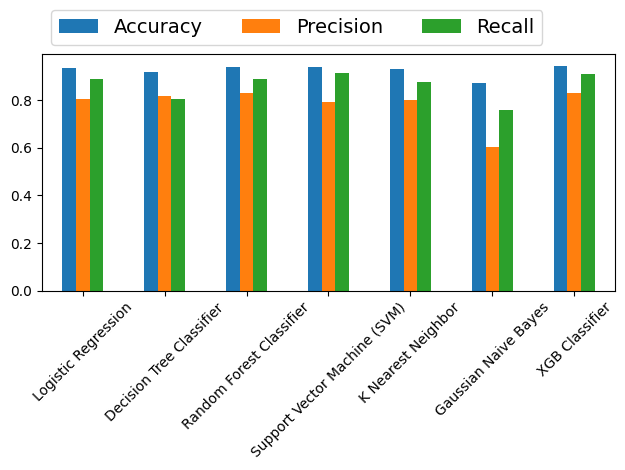

In [34]:
ax = df_model.plot.bar(rot=45)
ax.legend(ncol=len(model.keys()),bbox_to_anchor=(0,1),loc='lower left',prop={'size':14})
plt.tight_layout()

#### Observation:
- XGBoost Classifier has highest accuracy, precision, and recall score among other models at default params.
- Hence, we will further tune it using hyperparameter tuning (i.e., Grid Search CV)

## 4: Neural Network:

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [36]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [37]:
model = Sequential()

# 1st NN layer
model.add(Dense(128,input_dim=52,activation='relu'))

#2nd NN layer
model.add(Dense(64,activation='relu'))

#3rd NN Layer
model.add(Dense(32,activation='relu'))

# Flatten Layer
model.add(Flatten())

#Output Layer
model.add(Dense(1,activation='sigmoid'))

# Model Compilation
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


f:\netsol_project\task_1\credit_decisioning_risk_assesment\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 4.1: Model Summary is..

In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         6,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,153 (67.00 KB)

 Trainable params: 17,153 (67.00 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
4588/4588 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9483 - loss: 0.1317 - val_accuracy: 0.9387 - val_loss: 0.1684
Epoch 2/10
4588/4588 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9484 - loss: 0.1323 - val_accuracy: 0.9400 - val_loss: 0.1667
Epoch 3/10
4588/4588 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9493 - loss: 0.1300 - val_accuracy: 0.9399 - val_loss: 0.1750
Epoch 4/10
4588/4588 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9481 - loss: 0.1320 - val_accuracy: 0.9394 - val_loss: 0.1713
Epoch 5/10
4588/4588 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9496 - loss: 0.1285 - val_accuracy: 0.9400 - val_loss: 0.1838
Epoch 6/10
4588/4588 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9487 - loss: 0.1316 - val_accuracy: 0.9379 - val_loss: 0.1719
Epoch 7/10
4588/4588 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9496 - loss: 0.1299 - val_accuracy: 0.9396 - val_loss: 0.1707
Epoch 8/10
4588/4588 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9504 - loss: 0

## 5. Evaluating the Model:

In [41]:
model.metrics_names

['loss', 'compile_metrics']

#### 5.1: Model Evaluation:

In [42]:
model.evaluate(X_test,y_test)

1147/1147 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9422 - loss: 0.1740


[0.17983974516391754, 0.9400337934494019]

#### 5.1.1: For Prediction:

In [43]:
prediction = model.predict(X_test)
predicted_class = np.argmax(prediction,axis=1)

1147/1147 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


#### 5.1.2: Classification Report

In [45]:
from sklearn.metrics import classification_report

In [46]:
clf_report = classification_report(predicted_class,y_test)
print(clf_report)

              precision    recall  f1-score   support

         0.0       1.00      0.78      0.88     36704
         1.0       0.00      0.00      0.00         0

    accuracy                           0.78     36704
   macro avg       0.50      0.39      0.44     36704
weighted avg       1.00      0.78      0.88     36704



f:\netsol_project\task_1\credit_decisioning_risk_assesment\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\netsol_project\task_1\credit_decisioning_risk_assesment\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\netsol_project\task_1\credit_decisioning_risk_assesment\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

#### 6: HyperParameter Tuning for XGBoost Model
- Using RandomSearch CV

In [47]:
params = {
            "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
            "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
            "min_child_weight" : [ 1, 3, 5, 7 ],
            "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
            "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [48]:
# Hyperparameter Optimization using RandomSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [49]:
# Setting up timer
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec = divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec = divmod(temp_sec,60)
        print('\n Time taken %i hours %i minutes %s seconds'%(thour,tmin,round(tsec,2)))

In [51]:
import xgboost
classifier = xgboost.XGBClassifier()

In [52]:
random_search = RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,
                                  scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [53]:
from datetime import datetime

start_time = timer(None)
random_search.fit(X_train,y_train)
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken 0 hours 0 minutes 55.65 seconds


In [54]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [55]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 10,
 'learning_rate': 0.2,
 'gamma': 0.3,
 'colsample_bytree': 0.4}

#### 7. Setting up XGBoost Model

In [56]:
clf = xgboost.XGBClassifier(min_child_weight= 1,
                                max_depth= 6,
                                learning_rate= 0.25,
                                gamma= 0.3,
                                colsample_bytree= 0.5)

#### 7.1: Performing 10 Cross Validation Tests

In [57]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(clf,X_train,y_train,cv=10)
score

array([0.94653317, 0.94196976, 0.94626073, 0.94530718, 0.94217409,
       0.94346819, 0.94121654, 0.94475853, 0.94366869, 0.94005858])

In [58]:
clf.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [59]:
y_pred = clf.predict(X_test)
print(y_pred)

[0 1 0 ... 0 1 0]


In [60]:
accuracy = print('Accuracy Score:',accuracy_score(y_pred,y_test)*100)

Accuracy Score: 94.47199215344376


#### 7.1.2: Classification Report

In [61]:
from sklearn.metrics import confusion_matrix,classification_report

In [62]:
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[28053  1358]
 [  671  6622]]


In [63]:
clf_report = classification_report(y_pred,y_test)
print(clf_report)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97     29411
           1       0.83      0.91      0.87      7293

    accuracy                           0.94     36704
   macro avg       0.90      0.93      0.92     36704
weighted avg       0.95      0.94      0.95     36704



## 8: Saving Model Inference:
- Using Pickle

In [64]:
import pickle

In [65]:
# write-mode
with open('clf_pickle','wb') as f:
    pickle.dump(clf,f)

#
- ### using Joblib

In [66]:
!pip install joblib

In [67]:
import joblib

In [68]:
joblib.dump(clf,'clf_joblib')

['clf_joblib']

## The END!